In [2]:
#titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
df = df.dropna()
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [5]:
df = df.drop(['Name','Fare'],axis=1)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
882,0,2,male,27.0,0,0
883,1,1,female,19.0,0,0
884,0,3,female,7.0,1,2
885,1,1,male,26.0,0,0


In [6]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
882,0,2,1,27.0,0,0
883,1,1,0,19.0,0,0
884,0,3,0,7.0,1,2
885,1,1,1,26.0,0,0


In [7]:
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,1,-0.529366,1,0
1,1,1,0,0.604265,1,0
2,1,3,0,-0.245958,0,0
3,1,1,0,0.391709,1,0
4,0,3,1,0.391709,0,0
...,...,...,...,...,...,...
882,0,2,1,-0.175106,0,0
883,1,1,0,-0.741922,0,0
884,0,3,0,-1.592145,1,2
885,1,1,1,-0.245958,0,0


In [8]:
x = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,shuffle=True,random_state=2)

In [9]:
acc = []
for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(x_train,y_train)
  preds = model.predict(x_test)
  acc.append(accuracy_score(y_test,preds))
acc

[0.7471910112359551,
 0.7752808988764045,
 0.7528089887640449,
 0.7921348314606742,
 0.8033707865168539,
 0.8202247191011236,
 0.7921348314606742,
 0.8146067415730337,
 0.8202247191011236,
 0.8033707865168539]

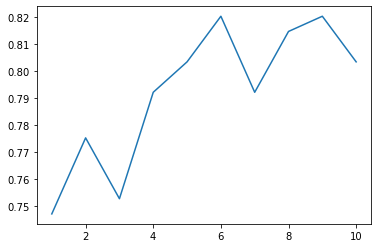

In [10]:
plt.plot([i for i in range(1,11)],acc)

In [11]:
acc = np.array(acc)
np.argmax(acc)

5

In [12]:
model = KNeighborsClassifier(np.argmax(acc)+1)
model.fit(x_train,y_train)
preds = model.predict(x_test)
probs = model.predict_proba(x_test)

In [13]:
cm = confusion_matrix(y_test,preds)
cm

array([[102,   7],
       [ 25,  44]], dtype=int64)

In [14]:
prob = probs[:,1]

In [15]:
#use probs[:,1] instead of probs[:,0] coz label of 1 is 1 and if u use probs[:,0] it would give 1-actual value 
fpr , tpr ,_ = roc_curve(y_test,prob)
print("AUC",auc(fpr,tpr))

AUC 0.8536098923015556


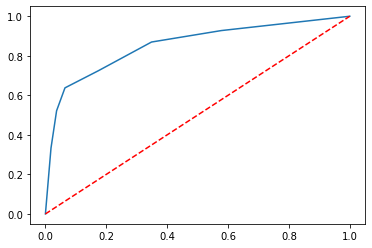

In [16]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')

In [26]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores_inbuilt = []
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    accuracy_scores_inbuilt.append(accuracy)
    print("For k = {}\n".format(k),accuracy)


For k = 1
 0.7471910112359551
For k = 2
 0.7752808988764045
For k = 3
 0.7528089887640449
For k = 4
 0.7921348314606742
For k = 5
 0.8033707865168539
For k = 6
 0.8202247191011236
For k = 7
 0.7921348314606742
For k = 8
 0.8146067415730337
For k = 9
 0.8202247191011236
For k = 10
 0.8033707865168539
For k = 11
 0.8258426966292135
For k = 12
 0.797752808988764
For k = 13
 0.8033707865168539
For k = 14
 0.7865168539325843
For k = 15
 0.7752808988764045
For k = 16
 0.7696629213483146
For k = 17
 0.8089887640449438
For k = 18
 0.8033707865168539
For k = 19
 0.7808988764044944


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


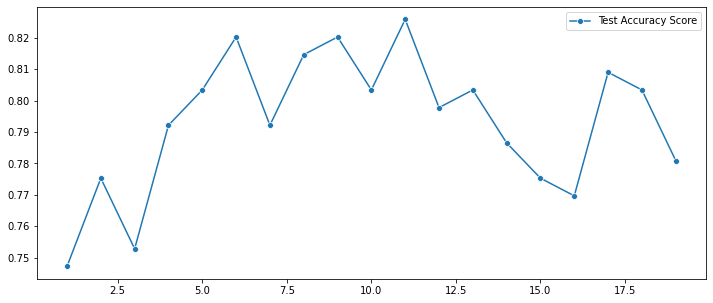

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),accuracy_scores_inbuilt,marker='o',label='Test Accuracy Score')